In [1]:
import jupyter_innotater as jd
import matplotlib.pyplot as plt

In [2]:
widget = jd.CustomBox()
widget.drawing_pad

DrawingPad(data=[[], [], []])

In [3]:
print(widget.drawing_pad.data)

[[], [], []]


In [4]:
widget.drawing_pad.data = [ [100,200,300], [100,20,30], [1,2,3]]

In [5]:
widget

CustomBox(children=(DrawingPad(data=[[100, 200, 300], [100, 20, 30], [1, 2, 3]]), VBox(children=(Text(value=''…

In [6]:
print(widget.get_saved())

{}


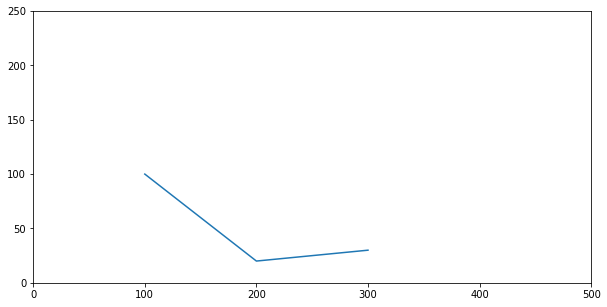

In [7]:
plt.figure(figsize=(10,5))
plt.plot(widget.drawing_pad.data[0], widget.drawing_pad.data[1])
plt.xlim(0,500)
plt.ylim(0,250)
plt.show()